In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.style.use('classic')
print(plt.style.available)
%matplotlib inline

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'dark_background', u'bmh', u'seaborn-talk', u'grayscale', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [232]:
energies = pd.read_csv('logfile.energies', sep='\s+', na_values='Failed')

In [183]:
energies[:3]

,PDB,DECOYS,RMSD,EEL,NB,ESURF,DIHED,VDWAALS,EGB,ESURF.1,ANGLE,EELEC,BOND
0,1BDD,decoy3_94.pdb,6.02,2955.5675,243.4040,45.4414,702.4891,-254.8827,-1230.4499,45.4414,10582.2659,-4450.3128,115.4790
1,1BDD,decoy22_16.pdb,4.01,2945.5734,259.5466,51.4817,730.5519,-232.2640,-1247.5766,51.4817,10583.9108,-4437.8018,95.9993
2,1BDD,decoy1_40.pdb,1.51,2955.6553,253.8653,44.5581,767.9266,-213.7803,-1186.7114,44.5581,10586.0531,-4437.8970,151.6372


In [184]:
# Cleanup
del energies['ESURF.1']
energies = energies.dropna()

In [185]:
energies[:3]

,PDB,DECOYS,RMSD,EEL,NB,ESURF,DIHED,VDWAALS,EGB,ANGLE,EELEC,BOND
0,1BDD,decoy3_94.pdb,6.02,2955.5675,243.4040,45.4414,702.4891,-254.8827,-1230.4499,10582.2659,-4450.3128,115.4790
1,1BDD,decoy22_16.pdb,4.01,2945.5734,259.5466,51.4817,730.5519,-232.2640,-1247.5766,10583.9108,-4437.8018,95.9993
2,1BDD,decoy1_40.pdb,1.51,2955.6553,253.8653,44.5581,767.9266,-213.7803,-1186.7114,10586.0531,-4437.8970,151.6372


In [186]:
energy_columns = list(energies)[3:]
# Exploded angle values, so disregarding
energy_columns.remove('ANGLE')
energy_columns

['EEL', 'NB', 'ESURF', 'DIHED', 'VDWAALS', 'EGB', 'EELEC', 'BOND']

In [187]:
energies['ETOT'] = energies[energy_columns].sum(axis=1)
energies[:3]

,PDB,DECOYS,RMSD,EEL,NB,ESURF,DIHED,VDWAALS,EGB,ANGLE,EELEC,BOND,ETOT
0,1BDD,decoy3_94.pdb,6.02,2955.5675,243.4040,45.4414,702.4891,-254.8827,-1230.4499,10582.2659,-4450.3128,115.4790,-1873.2644
1,1BDD,decoy22_16.pdb,4.01,2945.5734,259.5466,51.4817,730.5519,-232.2640,-1247.5766,10583.9108,-4437.8018,95.9993,-1834.4895
2,1BDD,decoy1_40.pdb,1.51,2955.6553,253.8653,44.5581,767.9266,-213.7803,-1186.7114,10586.0531,-4437.8970,151.6372,-1664.7462


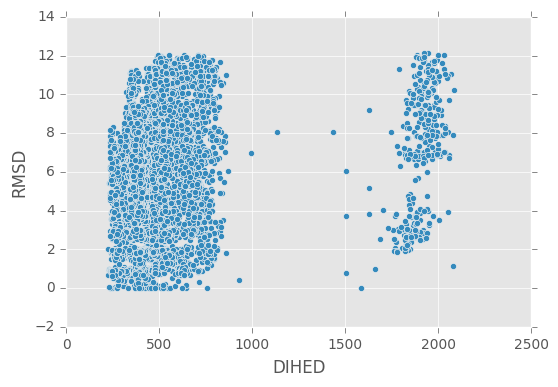

In [188]:
energies.plot.scatter('DIHED', 'RMSD')

# Principal component analysis

In [212]:
pca = PCA(n_components=3)

In [213]:
pca.fit(energies[energy_columns].as_matrix(), energies['RMSD'].as_matrix())

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [214]:
print(pca.explained_variance_ratio_) 

[ 0.57869601  0.28259653  0.13864148]


In [215]:
X = pca.transform(energies[energy_columns].as_matrix())
y = energies['RMSD'].as_matrix()
X

array([[-8941.11330598,  1733.79297541,   475.50743116],
       [-8929.22427865,  1702.12876996,   478.45860597],
       [-8887.12003473,  1740.4356981 ,   463.31440941],
       ..., 
       [-8965.53309761,  1683.33341571,   412.98675109],
       [-8962.27479356,  1657.90299044,   399.93203724],
       [-8947.44679052,  1672.97121426,   389.31505912]])

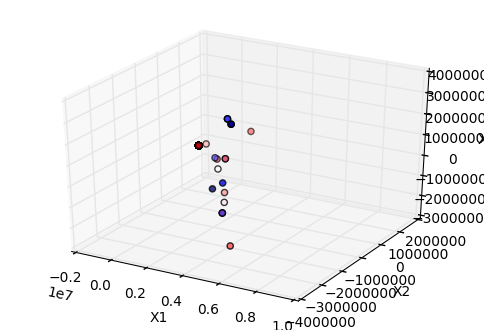

In [242]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cm.seismic)

#ax.set_xlim((0.1e7, 0.6e7))
ax.set_ylim((-0.4e7, 0.2e7))

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Linear model

In [194]:
from sklearn import linear_model
train_X = energies[energy_columns][:4000].as_matrix()
train_y = energies['RMSD'][:4000].as_matrix()

test_X = energies[energy_columns][4000:].as_matrix()
test_y = energies['RMSD'][4000:].as_matrix()

In [195]:
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [197]:
for i in range(len(energy_columns)):
    print energy_columns[i], regr.coef_[i]

EEL 0.00010566955775
NB -1.07107022837e-06
ESURF 0.156356893846
DIHED 0.00349828494522
VDWAALS -3.42806792157e-07
EGB -0.000606715107376
EELEC 0.00111810437832
BOND -6.79134025248e-06


In [198]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [199]:
test_pred = regr.predict(test_X)

print 'Explained variance score', explained_variance_score(test_y, test_pred)
print 'Mean squared error', mean_squared_error(test_y, test_pred)
print 'R2 score', r2_score(test_y, test_pred)

Explained variance score -0.792017625745
Mean squared error 16.4200284441
R2 score -0.856442394725


(0, 40)

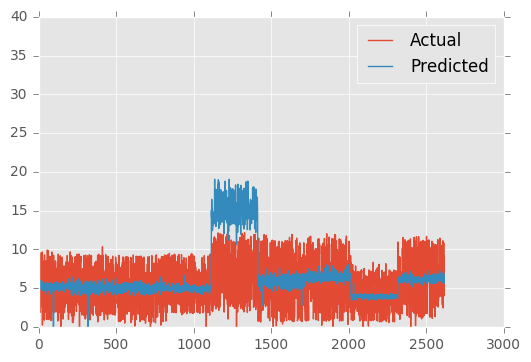

In [200]:
plt.plot(test_y, label='Actual')
plt.plot(test_pred, label='Predicted')
plt.legend()
plt.ylim((0, 40))